# Procesamiento de infraestructura critica

## Importamos librerias

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob, os

## Zona limite

In [4]:
limite = gpd.read_file('qgis\zona_limite.gpkg')
limite.head()

,geometry
0,"POLYGON ((-103.74436 19.22867, -103.74178 19.2..."


## Datos del Inventario Nacional de Vivienda

In [2]:
frente_mza = gpd.read_file('data/inv/01_Frentes_INV2020_shp/INV2020_IND_EU_FTE_01.shp')
frente_mza.head()

,CVEGEO,CVE_ENT,CVE_MUN,CVE_LOC,CVE_AGEB,CVE_MZA,CVEVIAL,CVESEG,CVEFT,NOMVIAL,...,PARATRAN_D,ESTABICI_D,DRENAJEP_D,TRANSCOL_D,RESTPEAT_D,RESTAUTO_D,PUESTOSF_D,PUESTOAM_D,FECHA_CEU,geometry
0,010060001009A044,01,006,0001,009A,044,00355,00004,7,JosÃ© Adolfo Villegas BelauzarÃ¡n,...,No dispone,No dispone,No dispone,Dispone,Sin restricciÃ³n,Sin restricciÃ³n,No dispone,No dispone,2020,"LINESTRING (2471724.194 1125293.957, 2471722.9..."
1,0100600070189014,01,006,0007,0189,014,70004,70004,1,Arroyo,...,No dispone,No dispone,No dispone,No dispone,Sin restricciÃ³n,Sin restricciÃ³n,No dispone,No dispone,2020,"LINESTRING (2468935.152 1121137.874, 2468973.8..."
2,0100600070189013,01,006,0007,0189,013,70004,70004,1,Arroyo,...,No dispone,No dispone,No dispone,No dispone,Sin restricciÃ³n,Sin restricciÃ³n,No dispone,No dispone,2020,"LINESTRING (2468834.522 1121120.108, 2468856.8..."
3,0100600070189015,01,006,0007,0189,015,70004,70004,1,Arroyo,...,No dispone,No dispone,No dispone,No dispone,Sin restricciÃ³n,Sin restricciÃ³n,No dispone,No dispone,2020,"LINESTRING (2469084.209 1121203.850, 2469019.4..."
4,0100600070189026,01,006,0007,0189,026,70004,70004,1,Arroyo,...,No dispone,No dispone,No dispone,No dispone,Sin restricciÃ³n,Sin restricciÃ³n,No dispone,No dispone,2020,"LINESTRING (2469235.536 1121218.304, 2469199.6..."


<Axes: >

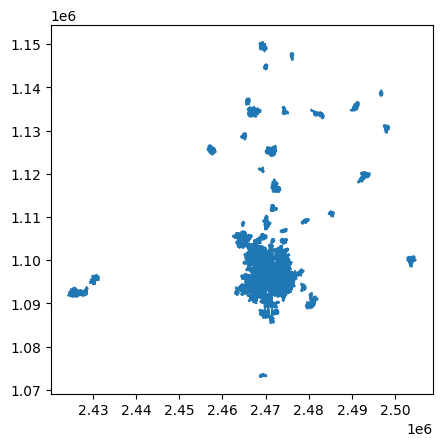

In [3]:
frente_mza.plot()

## Direcciones de archivos DENUE

In [4]:
denue_files = glob.glob("data/denue/*/*.shp")
denue_files[:5]

['data/denue\\10_denue_06_2013_shp\\DENUE_Nacional_06.shp',
 'data/denue\\12_denue_06_25022015_shp\\DENUE_INEGI_06_.shp',
 'data/denue\\2_denue_06_2010_shp\\DENUE Colima.shp',
 'data/denue\\4_denue_06_2011_shp\\denue1106c_06.shp',
 'data/denue\\6_denue_06_2012_shp\\denue_1_06.shp']

In [5]:
denue_files2 = glob.glob("data/denue/*/conjunto_de_datos/*.shp")
denue_files2

['data/denue\\20_denue_06_1117_shp\\conjunto_de_datos\\denue_inegi_06_.shp',
 'data/denue\\22_denue_06_0318_shp\\conjunto_de_datos\\denue_inegi_06_.shp',
 'data/denue\\24_denue_06_1118_shp\\conjunto_de_datos\\denue_inegi_06_.shp',
 'data/denue\\26_denue_06_0419_shp\\conjunto_de_datos\\denue_inegi_06_.shp',
 'data/denue\\28_denue_06_1119_shp\\conjunto_de_datos\\denue_inegi_06_.shp',
 'data/denue\\30_denue_06_0420_shp\\conjunto_de_datos\\denue_inegi_06_.shp',
 'data/denue\\32_denue_06_1120_shp\\conjunto_de_datos\\denue_inegi_06_.shp',
 'data/denue\\34_denue_06_0521_shp\\conjunto_de_datos\\denue_inegi_06_.shp',
 'data/denue\\36_denue_06_1121_shp\\conjunto_de_datos\\denue_inegi_06_.shp',
 'data/denue\\38_denue_06_0522_shp\\conjunto_de_datos\\denue_inegi_06_.shp',
 'data/denue\\40_denue_06_shp\\conjunto_de_datos\\denue_inegi_06_.shp']

In [6]:
denue_files = denue_files + denue_files2

In [7]:
len(denue_files)

17

In [8]:
rename_columns = {
  "desc_act": "nombre_act",
  "clase_act": "codigo_act",
  "fecha_alta":"alta"
}

In [9]:
df_full = gpd.GeoDataFrame()
for f in denue_files:
  gdf = gpd.read_file(f)
  
  # columns to lowercase
  gdf.columns = [x.lower() for x in gdf.columns]
  gdf.rename(columns=rename_columns, inplace=True)
  
  limite.crs = gdf.crs
  
  gdf = gpd.sjoin(gdf, limite, how="inner", predicate='intersects')
  if gdf.shape[0] == 0:
    continue
  #gdf = gdf[gdf['cve_mun'].isin(["010", "002"])]
  try:
    gdf = gdf[gdf['desc_act'].str.contains("Escuela|Farmacia|Hospital")]
  except:
    gdf = gdf[gdf['nombre_act'].str.contains("Escuela|Farmacia|Hospital")]
    
  df_full = pd.concat([df_full, gdf], axis=0)
  
df_full

,d_llave,cve_ent,entidad,cve_mun,municipio,cve_loc,localidad,ageb,manzana,nom_estab,...,letra_int,nomb_asent,tipocencom,nom_cencom,telefono,tipounieco,nic,nop,tipo_ue,clee
362,3513760.0,06,COLIMA,002,COLIMA,0001,Colima,0746,028,FARMACIA DE LA CRUZ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
453,2574899.0,06,COLIMA,002,COLIMA,0001,Colima,1458,016,FARMACIA GENERICOS MI SALUD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
581,4185355.0,06,COLIMA,002,COLIMA,0001,Colima,0746,034,FARMACIA GUADALUPANA DE COLIMA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
980,4186049.0,06,COLIMA,002,COLIMA,0001,Colima,0746,028,FARMACIAS GUADALAJARA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
987,2935124.0,06,COLIMA,002,COLIMA,0001,Colima,0746,022,FARMACIA ZAPOTLAN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29921,NaN,06,Colima,002,Colima,0001,Colima,1528,019,ESCUELA JOSE S BENITEZ ESPINOSA TURNO VESPERTINO,...,None,LA ALBARRADA,None,None,3123132836,Fijo,NaN,NaN,NaN,06002611122000713000000000U1
29940,NaN,06,Colima,002,Colima,0001,Colima,1528,019,ESCUELA JOSE S BENITEZ ESPINOZATURNO MATUTINO,...,None,LA ALBARRADA,None,None,3123132836,Fijo,NaN,NaN,NaN,06002611122000132000000000U4
29959,NaN,06,Colima,002,Colima,0001,Colima,1227,037,ESCUELA DE NATACION AQUA,...,None,RESIDENCIAL ESMERALDA NORTE,None,None,None,Fijo,NaN,NaN,NaN,06002611621000282000000000U8
29965,NaN,06,Colima,002,Colima,0001,Colima,0746,018,ESCUELA DE MUSICA STACCATO,...,None,CENTRO,None,None,None,Fijo,NaN,NaN,NaN,06002611611000142000000000U5


In [10]:
df_full.head()

,d_llave,cve_ent,entidad,cve_mun,municipio,cve_loc,localidad,ageb,manzana,nom_estab,...,letra_int,nomb_asent,tipocencom,nom_cencom,telefono,tipounieco,nic,nop,tipo_ue,clee
362,3513760.0,06,COLIMA,002,COLIMA,0001,Colima,0746,028,FARMACIA DE LA CRUZ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
453,2574899.0,06,COLIMA,002,COLIMA,0001,Colima,1458,016,FARMACIA GENERICOS MI SALUD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
581,4185355.0,06,COLIMA,002,COLIMA,0001,Colima,0746,034,FARMACIA GUADALUPANA DE COLIMA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
980,4186049.0,06,COLIMA,002,COLIMA,0001,Colima,0746,028,FARMACIAS GUADALAJARA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
987,2935124.0,06,COLIMA,002,COLIMA,0001,Colima,0746,022,FARMACIA ZAPOTLAN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#df_full.to_file("data/denue_2023.gpkg", driver="GPKG")

In [3]:
df_full = gpd.read_file("data/denue_2023.gpkg")

In [4]:
df_full

,d_llave,cve_ent,entidad,cve_mun,municipio,cve_loc,localidad,ageb,manzana,nom_estab,...,nomb_asent,tipocencom,nom_cencom,telefono,tipounieco,nic,nop,tipo_ue,clee,geometry
0,3513760.0,06,COLIMA,002,COLIMA,0001,Colima,0746,028,FARMACIA DE LA CRUZ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-103.72417 19.24134)
1,2574899.0,06,COLIMA,002,COLIMA,0001,Colima,1458,016,FARMACIA GENERICOS MI SALUD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-103.74017 19.23491)
2,4185355.0,06,COLIMA,002,COLIMA,0001,Colima,0746,034,FARMACIA GUADALUPANA DE COLIMA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-103.72746 19.24228)
3,4186049.0,06,COLIMA,002,COLIMA,0001,Colima,0746,028,FARMACIAS GUADALAJARA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-103.72556 19.24184)
4,2935124.0,06,COLIMA,002,COLIMA,0001,Colima,0746,022,FARMACIA ZAPOTLAN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-103.72384 19.24164)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2667,NaN,06,Colima,002,Colima,0001,Colima,1528,019,ESCUELA JOSE S BENITEZ ESPINOSA TURNO VESPERTINO,...,LA ALBARRADA,NaN,NaN,3123132836,Fijo,NaN,NaN,NaN,06002611122000713000000000U1,POINT (-103.73742 19.23532)
2668,NaN,06,Colima,002,Colima,0001,Colima,1528,019,ESCUELA JOSE S BENITEZ ESPINOZATURNO MATUTINO,...,LA ALBARRADA,NaN,NaN,3123132836,Fijo,NaN,NaN,NaN,06002611122000132000000000U4,POINT (-103.73745 19.23533)
2669,NaN,06,Colima,002,Colima,0001,Colima,1227,037,ESCUELA DE NATACION AQUA,...,RESIDENCIAL ESMERALDA NORTE,NaN,NaN,NaN,Fijo,NaN,NaN,NaN,06002611621000282000000000U8,POINT (-103.70827 19.27687)
2670,NaN,06,Colima,002,Colima,0001,Colima,0746,018,ESCUELA DE MUSICA STACCATO,...,CENTRO,NaN,NaN,NaN,Fijo,NaN,NaN,NaN,06002611611000142000000000U5,POINT (-103.72683 19.24368)


In [5]:
df_full.columns

Index(['d_llave', 'cve_ent', 'entidad', 'cve_mun', 'municipio', 'cve_loc',
       'localidad', 'ageb', 'manzana', 'nom_estab', 'nom_propie', 'tipo_calle',
       'calle', 'tipo_vial1', 'calle_1', 'tipo_vial2', 'calle_2', 'tipo_vial3',
       'calle_3', 'numero_ext', 'edificio', 'numero_int', 'tipo_asent',
       'colonia', 'cod_postal', 'telefono1', 'telefono2', 'ext_tel1',
       'ext_tel2', 'fax', 'codigo_act', 'nombre_act', 'centro_com',
       'num_local', 'correoelec', 'www', 'correoele2', 'tipo_estab',
       'est_perocu', 'des_perocu', 'estatus', 'alta', 'latitud', 'longitud',
       'index_right', 'id', 'raz_social', 'per_ocu', 'tipo_vial', 'nom_vial',
       'tipo_v_e_1', 'nom_v_e_1', 'tipo_v_e_2', 'nom_v_e_2', 'tipo_v_e_3',
       'nom_v_e_3', 'letra_ext', 'edificio_e', 'letra_int', 'nomb_asent',
       'tipocencom', 'nom_cencom', 'telefono', 'tipounieco', 'nic', 'nop',
       'tipo_ue', 'clee', 'geometry'],
      dtype='object')

In [8]:
df_full["tipo_vial1"].unique()

array(['CALLE', 'AVENIDA', 'NINGUNO', 'PRIVADA', 'CALZADA', nan,
       'CARRETERA'], dtype=object)

In [9]:
df_full["tipo_vial2"].unique()

array(['CALLE', 'AVENIDA', 'PRIVADA', 'ANDADOR', 'CALZADA', 'CALLEJÓN',
       nan], dtype=object)

In [10]:
df_full["tipo_asent"].unique()

array(['COLONIA', nan, 'RESIDENCIAL', 'FRACCIONAMIENTO', 'CIUDAD',
       'BARRIO', 'AMPLIACION'], dtype=object)

<AxesSubplot: >

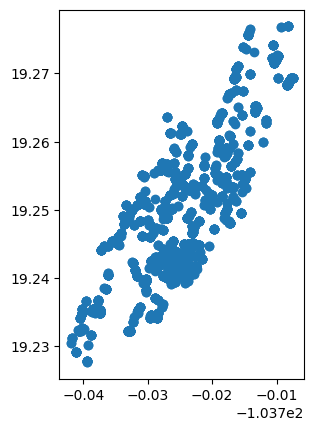

In [12]:
df_full.plot()

In [13]:
df_full.columns

Index(['d_llave', 'cve_ent', 'entidad', 'cve_mun', 'municipio', 'cve_loc',
       'localidad', 'ageb', 'manzana', 'nom_estab', 'nom_propie', 'tipo_calle',
       'calle', 'tipo_vial1', 'calle_1', 'tipo_vial2', 'calle_2', 'tipo_vial3',
       'calle_3', 'numero_ext', 'edificio', 'numero_int', 'tipo_asent',
       'colonia', 'cod_postal', 'telefono1', 'telefono2', 'ext_tel1',
       'ext_tel2', 'fax', 'codigo_act', 'nombre_act', 'centro_com',
       'num_local', 'correoelec', 'www', 'correoele2', 'tipo_estab',
       'est_perocu', 'des_perocu', 'estatus', 'alta', 'latitud', 'longitud',
       'geometry', 'index_right', 'id', 'raz_social', 'per_ocu', 'tipo_vial',
       'nom_vial', 'tipo_v_e_1', 'nom_v_e_1', 'tipo_v_e_2', 'nom_v_e_2',
       'tipo_v_e_3', 'nom_v_e_3', 'letra_ext', 'edificio_e', 'letra_int',
       'nomb_asent', 'tipocencom', 'nom_cencom', 'telefono', 'tipounieco',
       'nic', 'nop', 'tipo_ue', 'clee'],
      dtype='object')

In [14]:
columns_to_ignore = [
  'cve_ent', 'entidad', 'cve_mun', 'municipio','tipo_calle','calle', 'tipo_vial1', 
  'calle_1', 'tipo_vial2', 'calle_2', 'tipo_vial3','calle_3', #'numero_ext', 
  'edificio', 'numero_int', 'tipo_asent','colonia', 'cod_postal', 'telefono1', 
  'telefono2', 'ext_tel1','ext_tel2', 'fax','num_local','correoelec', 'www', 
  'correoele2','latitud', 'longitud','index_right', 'id', 'per_ocu', 'tipo_vial', 
  'nom_vial', 'tipo_v_e_1', 'nom_v_e_1','tipo_v_e_2', 'nom_v_e_2', 'tipo_v_e_3', 
  'nom_v_e_3', 'letra_ext','edificio_e', 'letra_int', 'nomb_asent', 'tipocencom', 
  'nom_cencom','telefono', 'tipounieco',  'nic', 'nop', "tipo_estab", 'clee',
  'tipo_ue', "centro_com", "raz_social","est_perocu","nom_propie","d_llave","des_perocu",
  "estatus"]

In [15]:
df_with_columns = df_full.drop(columns_to_ignore, axis=1)
print(df_with_columns.columns)
df_with_columns

Index(['cve_loc', 'localidad', 'ageb', 'manzana', 'nom_estab', 'numero_ext',
       'codigo_act', 'nombre_act', 'alta', 'geometry'],
      dtype='object')


,cve_loc,localidad,ageb,manzana,nom_estab,numero_ext,codigo_act,nombre_act,alta,geometry
362,0001,Colima,0746,028,FARMACIA DE LA CRUZ,49,464111,Farmacias sin minisúper,JULIO 2010,POINT (-103.72417 19.24134)
453,0001,Colima,1458,016,FARMACIA GENERICOS MI SALUD,553,464111,Farmacias sin minisúper,JULIO 2010,POINT (-103.74017 19.23491)
581,0001,Colima,0746,034,FARMACIA GUADALUPANA DE COLIMA,66,464112,Farmacias con minisúper,JULIO 2010,POINT (-103.72746 19.24228)
980,0001,Colima,0746,028,FARMACIAS GUADALAJARA,16,464112,Farmacias con minisúper,JULIO 2010,POINT (-103.72556 19.24184)
987,0001,Colima,0746,022,FARMACIA ZAPOTLAN,52,464112,Farmacias con minisúper,JULIO 2010,POINT (-103.72384 19.24164)
...,...,...,...,...,...,...,...,...,...,...
29921,0001,Colima,1528,019,ESCUELA JOSE S BENITEZ ESPINOSA TURNO VESPERTINO,320,611122,Escuelas de educación primaria del sector público,2010-07,POINT (-103.73742 19.23532)
29940,0001,Colima,1528,019,ESCUELA JOSE S BENITEZ ESPINOZATURNO MATUTINO,320,611122,Escuelas de educación primaria del sector público,2010-07,POINT (-103.73745 19.23533)
29959,0001,Colima,1227,037,ESCUELA DE NATACION AQUA,97,611621,Escuelas de deporte del sector privado,2019-11,POINT (-103.70827 19.27687)
29965,0001,Colima,0746,018,ESCUELA DE MUSICA STACCATO,39,611611,Escuelas de arte del sector privado,2019-11,POINT (-103.72683 19.24368)


In [16]:
df_with_columns.sort_values(by=["ageb","manzana", "numero_ext"], inplace=True)
df_with_columns

,cve_loc,localidad,ageb,manzana,nom_estab,numero_ext,codigo_act,nombre_act,alta,geometry
29979,0001,CIUDAD DE VILLA DE ÃLVAREZ,0273,001,INSTITO TECNOLÃGICO DE COLIMA,1,611312,Escuelas de educaciÃ³n superior del sector pÃº...,JULIO 2010,POINT (-103.72471 19.26223)
21259,0001,Ciudad de Villa de Ãlvarez,0273,001,INSTITO TECNOLÃGICO DE COLIMA,1,611312,Escuelas de educaciÃ³n superior del sector pÃº...,JULIO 2010,POINT (-103.72471 19.26223)
24307,0001,Ciudad de Villa de Ãlvarez,0273,001,INSTITO TECNOLÃGICO DE COLIMA,1,611312,Escuelas de educaciÃ³n superior del sector pÃº...,JULIO 2010,POINT (-103.72471 19.26223)
22639,0001,Ciudad de Villa de Ãlvarez,0273,001,INSTITO TECNOLÃGICO DE COLIMA,1,611312,Escuelas de educaciÃ³n superior del sector pÃº...,2010-07,POINT (-103.72471 19.26223)
21807,0001,Ciudad de Villa de Álvarez,0273,001,INSTITO TECNOLOGICO DE COLIMA,24A,611312,Escuelas de educación superior del sector público,JULIO 2010,POINT (-103.72384 19.26158)
...,...,...,...,...,...,...,...,...,...,...
24715,0001,Colima,1528,019,ESCUELA JOSE S. BENITEZ ESPINOZA.TURNO MATUTINO,320,611122,Escuelas de educación primaria del sector público,2010-07,POINT (-103.73745 19.23533)
24673,0001,Colima,1528,019,ESCUELA JOSE S BENITEZ ESPINOSA TURNO VESPERTINO,320,611122,Escuelas de educación primaria del sector público,2010-07,POINT (-103.73742 19.23532)
24676,0001,Colima,1528,019,ESCUELA JOSE S BENITEZ ESPINOZATURNO MATUTINO,320,611122,Escuelas de educación primaria del sector público,2010-07,POINT (-103.73745 19.23533)
29921,0001,Colima,1528,019,ESCUELA JOSE S BENITEZ ESPINOSA TURNO VESPERTINO,320,611122,Escuelas de educación primaria del sector público,2010-07,POINT (-103.73742 19.23532)


In [17]:
# check duplicates in agenb and manzana

df_with_columns["agebmanzana"] = df_with_columns["ageb"] + df_with_columns["manzana"] + df_with_columns["numero_ext"].astype(str)
df_with_columns

,cve_loc,localidad,ageb,manzana,nom_estab,numero_ext,codigo_act,nombre_act,alta,geometry,agebmanzana
29979,0001,CIUDAD DE VILLA DE ÃLVAREZ,0273,001,INSTITO TECNOLÃGICO DE COLIMA,1,611312,Escuelas de educaciÃ³n superior del sector pÃº...,JULIO 2010,POINT (-103.72471 19.26223),02730011
21259,0001,Ciudad de Villa de Ãlvarez,0273,001,INSTITO TECNOLÃGICO DE COLIMA,1,611312,Escuelas de educaciÃ³n superior del sector pÃº...,JULIO 2010,POINT (-103.72471 19.26223),02730011
24307,0001,Ciudad de Villa de Ãlvarez,0273,001,INSTITO TECNOLÃGICO DE COLIMA,1,611312,Escuelas de educaciÃ³n superior del sector pÃº...,JULIO 2010,POINT (-103.72471 19.26223),02730011
22639,0001,Ciudad de Villa de Ãlvarez,0273,001,INSTITO TECNOLÃGICO DE COLIMA,1,611312,Escuelas de educaciÃ³n superior del sector pÃº...,2010-07,POINT (-103.72471 19.26223),02730011
21807,0001,Ciudad de Villa de Álvarez,0273,001,INSTITO TECNOLOGICO DE COLIMA,24A,611312,Escuelas de educación superior del sector público,JULIO 2010,POINT (-103.72384 19.26158),027300124A
...,...,...,...,...,...,...,...,...,...,...,...
24715,0001,Colima,1528,019,ESCUELA JOSE S. BENITEZ ESPINOZA.TURNO MATUTINO,320,611122,Escuelas de educación primaria del sector público,2010-07,POINT (-103.73745 19.23533),1528019320
24673,0001,Colima,1528,019,ESCUELA JOSE S BENITEZ ESPINOSA TURNO VESPERTINO,320,611122,Escuelas de educación primaria del sector público,2010-07,POINT (-103.73742 19.23532),1528019320
24676,0001,Colima,1528,019,ESCUELA JOSE S BENITEZ ESPINOZATURNO MATUTINO,320,611122,Escuelas de educación primaria del sector público,2010-07,POINT (-103.73745 19.23533),1528019320
29921,0001,Colima,1528,019,ESCUELA JOSE S BENITEZ ESPINOSA TURNO VESPERTINO,320,611122,Escuelas de educación primaria del sector público,2010-07,POINT (-103.73742 19.23532),1528019320


In [18]:
df_with_columns.drop_duplicates(subset=["agebmanzana"], inplace=True)

In [19]:
df_with_columns.columns

Index(['cve_loc', 'localidad', 'ageb', 'manzana', 'nom_estab', 'numero_ext',
       'codigo_act', 'nombre_act', 'alta', 'geometry', 'agebmanzana'],
      dtype='object')

In [20]:
df_with_columns.localidad.unique()

array(['CIUDAD DE VILLA DE Ã\x81LVAREZ', 'Ciudad de Villa de Álvarez',
       'COLIMA', 'Colima'], dtype=object)

In [21]:
print(df_with_columns.nom_estab.unique())
df_with_columns.nom_estab.unique()

['INSTITO TECNOLÃ\x93GICO DE COLIMA' 'INSTITO TECNOLOGICO DE COLIMA'
 'INSTITO TECNOLÓGICO DE COLIMA' 'FARMACIA ZAPOTLAN'
 'FARMACIAS GUADALAJARA' '560 COLIMA 3' 'FARMACIA DE GENERICOS'
 'FARMACIAS DE SIMILARES' 'ESCUELA PRIMARIA RAFAEL BRISEÑO RAMIREZ'
 'INSTITUTO MARCELA DOMENE MATERNAL' 'CURSOS DE INGLES'
 'DISTRIBUCIONES MÉDICAS DE OCCIDENTE' 'UPE UNIDAD PSICO EDUCATIVA'
 'ESCUELA DE BELLEZA BLANCHE' 'ESCUELA DE GASTRONOMIA' 'BLANCHE'
 'CENTRO HOLISTICO OM-YAM' 'ARAN COLIMA' 'LATIN GIRLS POLE DANCE'
 'CENTRO DE CAPACITACIÓN TECNICA DEL ESTADO DE COLIMA'
 'UNIVERSIDAD UNIVER COLIMA' 'UNIVERSIDAD UNIVER COLIMA  A.C.'
 'UNIVERSIDAD UNIVER COLIMA AC' 'ESCUELA DE INGLES CEMBI'
 'PROYECTO ENSAMBLE CASA DE LAS ARTES'
 'CENTRO DE ENSEÑANZA MUSICAL JAVIER FLORES'
 'ESCUELA PRIMARIA FEDERAL ALEJANDRO FLORES GARIBAY TM'
 'JARDIN DE NIÑOS ELENA MACEDO PARDO'
 'LITTLE SWEET PEAS ESTANCIA INFANTIL' 'UNIMED' 'CENTRO EDUCATIVO CAYRI'
 'LOGOS LENGUAS ESCUELA DE LENGUAS AGENCIA DE TRADUCCIÓN INGLES 

array(['INSTITO TECNOLÃ\x93GICO DE COLIMA',
       'INSTITO TECNOLOGICO DE COLIMA', 'INSTITO TECNOLÓGICO DE COLIMA',
       'FARMACIA ZAPOTLAN', 'FARMACIAS GUADALAJARA', '560 COLIMA 3',
       'FARMACIA DE GENERICOS', 'FARMACIAS DE SIMILARES',
       'ESCUELA PRIMARIA RAFAEL BRISEÑO RAMIREZ',
       'INSTITUTO MARCELA DOMENE MATERNAL', 'CURSOS DE INGLES',
       'DISTRIBUCIONES MÉDICAS DE OCCIDENTE',
       'UPE UNIDAD PSICO EDUCATIVA', 'ESCUELA DE BELLEZA BLANCHE',
       'ESCUELA DE GASTRONOMIA', 'BLANCHE', 'CENTRO HOLISTICO OM-YAM',
       'ARAN COLIMA', 'LATIN GIRLS POLE DANCE',
       'CENTRO DE CAPACITACIÓN TECNICA DEL ESTADO DE COLIMA',
       'UNIVERSIDAD UNIVER COLIMA', 'UNIVERSIDAD UNIVER COLIMA  A.C.',
       'UNIVERSIDAD UNIVER COLIMA AC', 'ESCUELA DE INGLES CEMBI',
       'PROYECTO ENSAMBLE CASA DE LAS ARTES',
       'CENTRO DE ENSEÑANZA MUSICAL JAVIER FLORES',
       'ESCUELA PRIMARIA FEDERAL ALEJANDRO FLORES GARIBAY TM',
       'JARDIN DE NIÑOS ELENA MACEDO PARDO',
     